# Object Detection Test

## Testing YOLOv11n Model

In [5]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

In [22]:
# Load a COCO-pretrained YOLO11n model

# Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data="coco8.yaml", epochs=100, imgsz=640)
model = YOLO("yolo11l.pt")

In [23]:
results = model.track(source=0, show=True)


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 719.2ms
0: 480x640 1 person, 560.5ms
0: 480x640 1 person, 602.1ms
0: 480x640 1 person, 630.3ms
0: 480x640 1 person, 607.5ms
0: 480x640 1 person, 597.1ms
0: 480x640 1 person, 606.7ms
0: 480x640 1 person, 655.2ms
0: 480x640 1 person, 673.8ms
Speed: 3.8ms preprocess, 626.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


## Testing Cascade Classifier

In [27]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

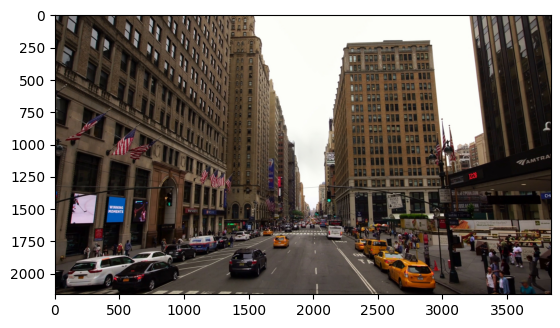

In [13]:
img = cv2.imread("image.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
plt.show()

In [14]:
found = cascade.detectMultiScale(img_gray, minSize=(20, 20))

In [15]:
for (x, y, w, h) in found:
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 5)

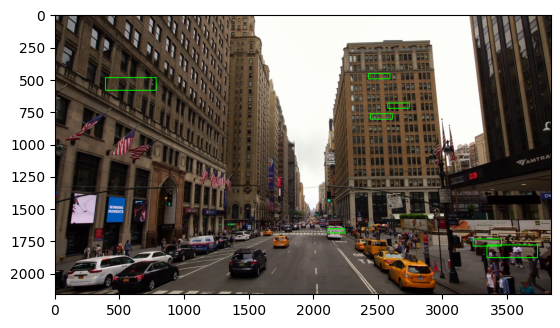

In [16]:
plt.imshow(img_rgb)
plt.show()

This model was really really bad with accuracy for licence plates, maybe it'll be better with faces?

In [28]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

print("Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Convert to grayscale (Haar cascades work on grayscale images)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect objects
    faces = cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,  # smaller = more sensitive, slower
        minNeighbors=5,   # higher = fewer false positives
        minSize=(30, 30)
    )

    # Draw rectangles and print coordinates
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(f"Detected face at X:{x}, Y:{y}, Width:{w}, Height:{h}")

    # Display annotated frame
    cv2.imshow("Haar Cascade Live", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Press 'q' to quit
Detected face at X:278, Y:223, Width:199, Height:199
Detected face at X:285, Y:219, Width:195, Height:195
Detected face at X:277, Y:211, Width:204, Height:204
Detected face at X:285, Y:217, Width:187, Height:187
Detected face at X:287, Y:216, Width:183, Height:183
Detected face at X:289, Y:220, Width:175, Height:175
Detected face at X:290, Y:225, Width:168, Height:168
Detected face at X:291, Y:229, Width:164, Height:164
Detected face at X:290, Y:233, Width:161, Height:161
Detected face at X:291, Y:233, Width:159, Height:159
Detected face at X:290, Y:235, Width:157, Height:157
Detected face at X:292, Y:245, Width:150, Height:150
Detected face at X:292, Y:245, Width:150, Height:150
Detected face at X:294, Y:246, Width:147, Height:147
Detected face at X:295, Y:247, Width:146, Height:146
Detected face at X:295, Y:246, Width:148, Height:148
Detected face at X:327, Y:245, Width:61, Height:61
Detected face at X:326, Y:243, Width:59, Height:59
Detected face at X:392, Y:221, W

One benefit of this model is that it is blasingly fast. One problem with this model is that it is a very very old model. One good thing about this model is that it works really well with eyes and faces, but that's useless for our purposes.

In [44]:
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from PIL import Image


# Load pre-trained Faster R-CNN with ResNet50-FPN backbone
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval() # Set the model to evaluation mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [46]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import cv2
from PIL import Image
import time

device = torch.device("cuda"if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights).to(device)
model.eval()

# Get preprocessing transform and COCO labels
preprocess = weights.transforms()
categories = weights.meta["categories"]

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

print("Press 'q' to quit")

while True:
    start_time = time.time()
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame BGR → RGB and to PIL
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)

    # Preprocess and move to GPU
    input_tensor = preprocess(pil_image).unsqueeze(0).to(device)

    # Inference
    with torch.no_grad():
        outputs = model(input_tensor)[0]

    # Extract predictions
    boxes = outputs["boxes"].cpu()
    labels = outputs["labels"].cpu()
    scores = outputs["scores"].cpu()

    # Draw detections
    for box, label, score in zip(boxes, labels, scores):
        if score < 0.5:
            continue
        x1, y1, x2, y2 = box.int().tolist()
        cls_name = categories[label]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{cls_name}: {score:.2f}",
                    (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 255, 255), 1)

    # Calculate FPS
    fps = 1.0 / (time.time() - start_time)
    cv2.putText(frame, f"FPS: {fps:.2f}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    cv2.imshow("Faster R-CNN Live (GPU)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Using device: cpu
Press 'q' to quit


This model is very accurate, but it requires really expensive hardware to run.